In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#Dataset
import zipfile
z = zipfile.ZipFile('Brain Tumor Dataset.zip')
z.extractall()

In [3]:
folder = 'brain_tumor_dataset/yes/'
count = 1
for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "Y_" +str(count)+".jpg"
    os.rename(source,destination)
    count += 1
print("All file are renamed in the yes dir")

All file are renamed in the yes dir


In [4]:
folder = 'brain_tumor_dataset/no/'
count = 1
for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "N_" +str(count)+".jpg"
    os.rename(source,destination)
    count += 1
print("All file are renamed in the no dir")

All file are renamed in the no dir


In [1]:
# EDA

In [5]:
listyes = os.listdir("brain_tumor_dataset/yes")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("brain_tumor_dataset/no")
number_files_no = len(listno)
print(number_files_no)

155
98


In [10]:
#plot

Text(0.5, 1.0, 'Count of brain tumor images')

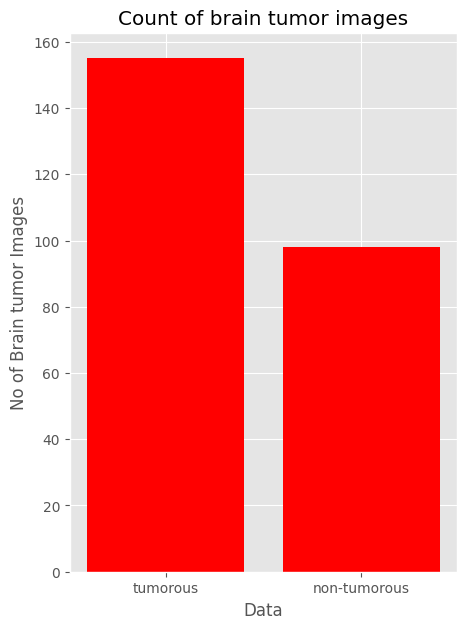

In [6]:
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}
typex = data.keys()
values  = data.values()
fig = plt.figure(figsize=(5,7))
plt.bar(typex,values,color='red')
plt.xlabel("Data")
plt.ylabel("No of Brain tumor Images")
plt.title("Count of brain tumor images")

In [15]:
# Data Augmentation
# 155(61%), 98(39%) ==> imbalance

In [17]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [7]:
#"brain_tumor_dataset/yes/Y_1.jpg"
def timing(sec_elapsed):
    h = int(sec_elapsed/(60*60))
    m = int(sec_elapsed/(60*60)/60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

In [8]:
def augmentation_data(file_dir,n_generated_samples,save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10,
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3,1.0),
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image = cv2.imread(file_dir + '/' +filename)
        image =image.reshape((1,)+image.shape) #reshape(no,width,height,channel)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x=image, batch_size=1,save_to_dir = save_to_dir,
                                   save_prefix = save_prefix, save_format='jpg'):
            i+=1
            if i>=n_generated_samples:
                break
            
        
    

In [13]:
import time
start_time = time.time()

yes_path = r'C:\Users\sivab\Brain Tumor Image Classification\brain_tumor_dataset\yes'
no_path = r'C:\Users\sivab\Brain Tumor Image Classification\brain_tumor_dataset\no'


augmented_data_path = r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\\'


augmentation_data(file_dir = yes_path,n_generated_samples = 6, save_to_dir= augmented_data_path+'yes')
augmentation_data(file_dir = no_path,n_generated_samples = 9, save_to_dir= augmented_data_path+'no')

end_time = time.time()
execution_time = end_time - start_time
print(timing(execution_time))

0:0:46.002434492111206


In [14]:
def data_summary(main_path):
    yes_path =  r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\yes\\'
    no_path =  r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\no\\'
    
    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path))
    
    n=(n_pos+n_neg)
    pos_per = (n_pos/n)*100
    neg_per = (n_neg/n)*100
    print(f"{pos_per} {neg_per}")
    
data_summary(augmented_data_path) 
# data balanced

51.29762562120376 48.70237437879624


In [15]:
listyes = os.listdir(r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\yes\\')
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir(r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\no\\')
number_files_no = len(listno)
print(number_files_no)

929
882


In [16]:
!pip install imutils


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25855 sha256=fdf70cda58494a42342869bb9bee3db524faf6356087f91f77ba55bcba6fcbfc
  Stored in directory: c:\users\sivab\appdata\local\pip\cache\wheels\5b\76\96\ad0c321506837bef578cf3008df3916c23018435a355d9f6b1
Successfully built imutils



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import imutils
def crop_brain_tumor(image,plot=False):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray,(5,5),0)
    
    th = cv2.threshold(gray,45,255,cv2.THRESH_BINARY)[1]
    img_erode = cv2.erode(th,None,iterations=2)
    img_dilate = cv2.dilate(th,None,iterations=2)
    
    cnts = cv2.findContours(img_dilate.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    # cv2.RETR_EXTERNAL retrieves only the extreme outer contours.
    #  cv2.CHAIN_APPROX_SIMPLE compresses the contour data, removing all redundant points and thereby saving memory.
    # returns a tuple containing the contours and hierarchy
    
    cnts = imutils.grab_contours(cnts)
    # extracts the contours list from the tuple returned by cv2.findContours()
    
    c = max(cnts,key=cv2.contourArea)
    # finds the contour with the largest area from the list of contours
    
    extLeft = tuple(c[c[:,:,0].argmin()][0])
    # the coordinates of the leftmost point of the largest contour
    
    extRight = tuple(c[c[:,:,0].argmax()][0])
    #  the coordinates of the rightmost point of the largest contour
    
    extTop = tuple(c[c[:,:,1].argmin()][0])
    # the coordinates of the topmost point of the largest contour in the variable
    
    extBot = tuple(c[c[:,:,1].argmax()][0])
    # the coordinates of the bottommost point of the largest contour in the variable 
   

    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]] 
    
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        plt.show()
    return new_image

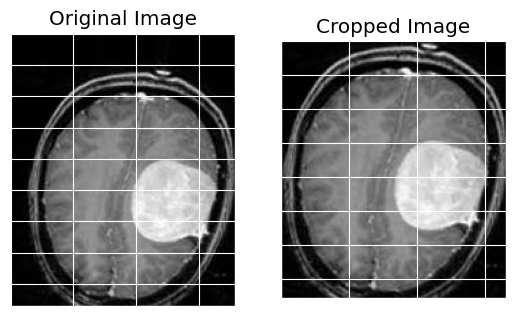

array([[[3, 3, 3],
        [3, 3, 3],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[6, 6, 6],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[6, 6, 6],
        [6, 6, 6],
        [7, 7, 7],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[2, 2, 2],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [19]:
#testing an image 
img = cv2.imread(r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\yes\aug_Y_1_0_9141.jpg')
crop_brain_tumor(img,True)

In [20]:
#image loading

In [21]:
from sklearn.utils import shuffle
def load_data(dir_list,image_size):
    X = []
    y = []
    image_width, image_height = image_size 
    for directory in dir_list:
        for filename in os.listdir(directory):
            image = cv2.imread(directory + '/' +filename)
            image = crop_brain_tumor(image,plot=False)
            image = cv2.resize(image, dsize=(image_width, image_height),interpolation=cv2.INTER_CUBIC)
            image = image/255.00
            X.append(image)
            if directory[-3:]=="yes":
                y.append(1)
            else:
                y.append(0)
                
    X = np.array(X)
    y = np.array(y)
    X,y = shuffle(X,y)
    print(f"Number of example is :{len(X)}")
    print(f"X shape is :{X.shape}")
    print(f"y shape is :{y.shape}")
    return X,y

In [22]:
augmented_path = r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\\'
augmented_yes =  r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\yes\\'
augmented_no =  r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\no\\'

image_width, image_height = (240,240)
X,y = load_data([augmented_yes,augmented_no],(image_width,image_height))

Number of example is :1811
X shape is :(1811, 240, 240, 3)
y shape is :(1811,)


In [23]:
def plot_sample_images(X, y, n=50):

    for label in[0,1]:
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
            
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))
        
        i = 1        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)
            
            i += 1
        
            label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

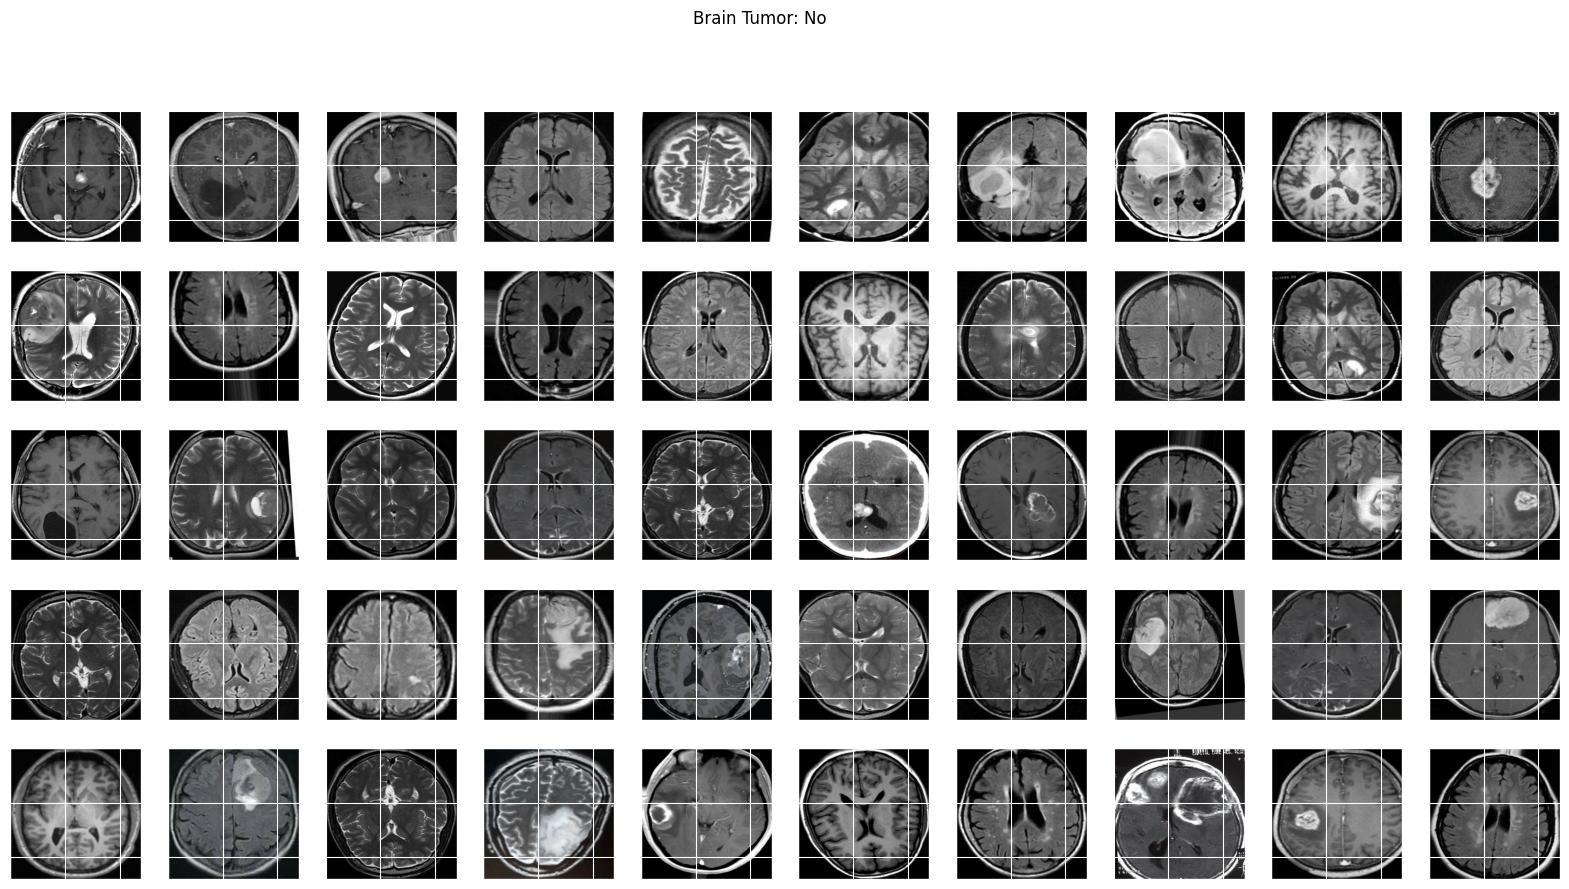

<Figure size 2000x1000 with 0 Axes>

In [24]:
plot_sample_images(X,y)


In [25]:
# Data Splitting
#Train, test, Validation

In [26]:
if not os.path.isdir(r'C:\Users\sivab\Brain Tumor Image Classification\tumorous_and_nontumorous'):
    base_dir = r'C:\Users\sivab\Brain Tumor Image Classification\tumorous_and_nontumorous'
    os.mkdir(base_dir)

In [27]:
if not os.path.isdir(r'C:\Users\sivab\Brain Tumor Image Classification\tumorous_and_nontumorous\train\\'):
    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)

if not os.path.isdir(r'C:\Users\sivab\Brain Tumor Image Classification\tumorous_and_nontumorous\test\\'):
    test_dir = os.path.join(base_dir, 'test')
    os.mkdir(test_dir)
    
if not os.path.isdir(r'C:\Users\sivab\Brain Tumor Image Classification\tumorous_and_nontumorous\valid\\'):
    valid_dir = os.path.join(base_dir, 'valid')
    os.mkdir(valid_dir)



In [28]:
if not os.path.isdir(r'C:\Users\sivab\Brain Tumor Image Classification\tumorous_and_nontumorous\train\tumorous\\'):
                     infected_train_dir = os.path.join(train_dir,'tumorous')
                     os.mkdir(infected_train_dir)
                     
if not os.path.isdir(r'C:\Users\sivab\Brain Tumor Image Classification\tumorous_and_nontumorous\test\tumorous\\'):
                     infected_test_dir = os.path.join(test_dir,'tumorous')
                     os.mkdir(infected_test_dir)

if not os.path.isdir(r'C:\Users\sivab\Brain Tumor Image Classification\tumorous_and_nontumorous\valid\tumorous\\'):
                     infected_valid_dir = os.path.join(valid_dir,'tumorous')
                     os.mkdir(infected_valid_dir)

In [29]:
if not os.path.isdir(r'C:\Users\sivab\Brain Tumor Image Classification\nontumorous_and_nontumorous\train\tumorous\\'):
                     healthy_train_dir = os.path.join(train_dir,'nontumorous')
                     os.mkdir(healthy_train_dir)
                     
if not os.path.isdir(r'C:\Users\sivab\Brain Tumor Image Classification\nontumorous_and_nontumorous\test\tumorous\\'):
                     healthy_test_dir = os.path.join(test_dir,'nontumorous')
                     os.mkdir(healthy_test_dir)

if not os.path.isdir(r'C:\Users\sivab\Brain Tumor Image Classification\nontumorous_and_nontumorous\valid\tumorous\\'):
                     healthy_valid_dir = os.path.join(valid_dir,'nontumorous')
                     os.mkdir(healthy_valid_dir)

In [30]:
original_dataset_tumorous = os.path.join(r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\yes\\')
original_dataset_nontumorous = os.path.join(r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\no\\')

In [31]:
files = os.listdir( r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\yes\\')
fnames = []
for i in range(0,651):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorous,fname)
    dst = os.path.join(infected_train_dir,fname)
    shutil.copyfile(src, dst)

In [32]:
files = os.listdir( r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\yes\\')
fnames = []
for i in range(651,837):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorous,fname)
    dst = os.path.join(infected_test_dir,fname)
    shutil.copyfile(src, dst)

In [34]:
files = os.listdir( r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\yes\\')
fnames = []
for i in range(837,929):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorous,fname)
    dst = os.path.join(infected_valid_dir,fname)
    shutil.copyfile(src, dst)

In [35]:
files = os.listdir( r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\no\\')
fnames = []
for i in range(0,617):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorous,fname)
    dst = os.path.join(healthy_train_dir,fname)
    shutil.copyfile(src, dst)

In [36]:
files = os.listdir( r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\no\\')
fnames = []
for i in range(617,794):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorous,fname)
    dst = os.path.join(healthy_test_dir,fname)
    shutil.copyfile(src, dst)

In [37]:
files = os.listdir( r'C:\Users\sivab\Brain Tumor Image Classification\augmented_data\no\\')
fnames = []
for i in range(794,882):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorous,fname)
    dst = os.path.join(healthy_valid_dir,fname)
    shutil.copyfile(src, dst)

In [38]:
# Model Building

In [54]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  horizontal_flip= 0.4,
                  vertical_flip= 0.4,
                  rotation_range= 40,
                  shear_range = 0.2,
                  width_shift_range = 0.4,
                  height_shift_range = 0.4,
                  fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [40]:
train_generator = train_datagen.flow_from_directory(r'C:\Users\sivab\Brain Tumor Image Classification\tumorous_and_nontumorous\train\\',batch_size=32,target_size=(240,240),class_mode='categorical',shuffle=True,seed=42,color_mode='rgb')

test_generator = test_datagen.flow_from_directory(r'C:\Users\sivab\Brain Tumor Image Classification\tumorous_and_nontumorous\test\\',batch_size=32,target_size=(240,240),class_mode='categorical',shuffle=True,seed=42,color_mode='rgb')

valid_generator =valid_datagen.flow_from_directory(r'C:\Users\sivab\Brain Tumor Image Classification\tumorous_and_nontumorous\valid\\',batch_size=32,target_size=(240,240),class_mode='categorical',shuffle=True,seed=42,color_mode='rgb')

Found 1268 images belonging to 2 classes.
Found 363 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [41]:
class_labels = train_generator.class_indices
class_name ={value:key for(key,value) in class_labels.items()}

class_name

{0: 'nontumorous', 1: 'tumorous'}

In [72]:
base_model = VGG19(input_shape=(240,240,3),include_top=False,weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
x = base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)

class_2 = Dense(1152, activation='relu')(drop_out)

output = Dense(2,activation = 'softmax')(class_2)

model_01 = Model(base_model.input,output)

model_01.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [74]:
#callback
filepath = r'C:\Users\sivab\Brain Tumor Image Classification\model.keras'
es = EarlyStopping(monitor = 'val_loss',verbose=1, mode='min',patience=4)
#  If the validation loss does not improve for 4 consecutive epochs, training will be stopped. Verbose print a message when early stopping occurs.

cp = ModelCheckpoint(filepath,monitor = 'val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
# The model will be saved(not only weights) at the end of each epoch at filepath if the validation loss has improved.

lrr = ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.001)
#  This reduces the learning rate by a factor of 0.5 when validation accuracy does not improve for consecutive 3 epochs. 
# The learning rate will not be reduced below 0.001

In [75]:
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model_01.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

c:\Users\sivab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [76]:
history_01 = model_01.fit(train_generator, steps_per_epoch=10, epochs=2, callbacks=[es,cp,lrr],validation_data=valid_generator)

Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4424 - loss: 0.8125
Epoch 1: val_loss improved from inf to 0.69146, saving model to C:\Users\sivab\Brain Tumor Image Classification\model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 96s 9s/step - accuracy: 0.4442 - loss: 0.8088 - val_accuracy: 0.5556 - val_loss: 0.6915 - learning_rate: 1.0000e-04
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5669 - loss: 0.6993
Epoch 2: val_loss did not improve from 0.69146
10/10 ━━━━━━━━━━━━━━━━━━━━ 71s 7s/step - accuracy: 0.5665 - loss: 0.6988 - val_accuracy: 0.5167 - val_loss: 0.6943 - learning_rate: 1.0000e-04


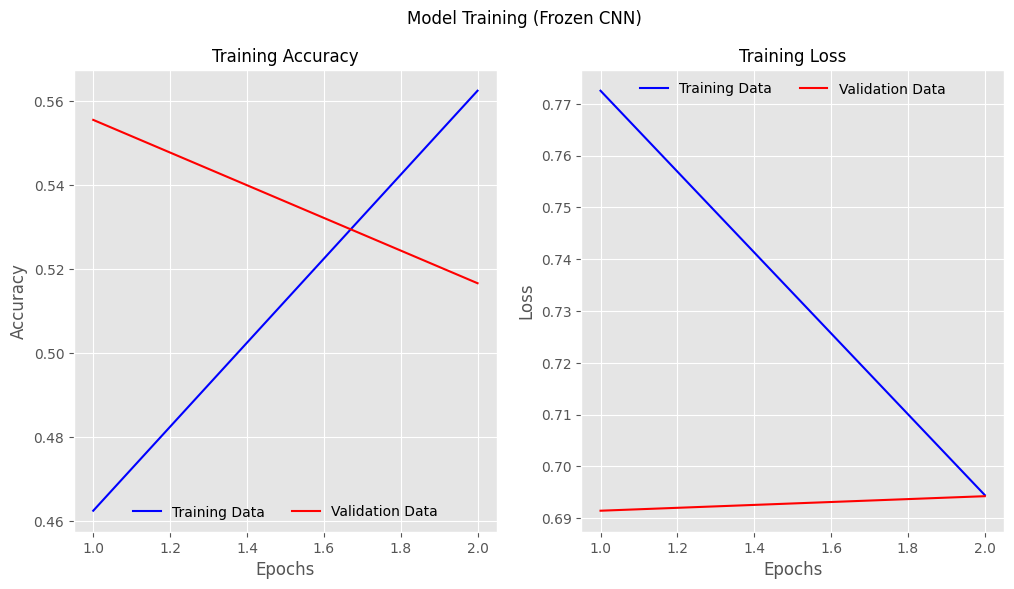

In [77]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [79]:
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_01.save_weights(filepath="model_weights/vgg19_model_01.weights.h5", overwrite=True)

In [80]:
model_01.load_weights(r'C:\Users\sivab\Brain Tumor Image Classification\model_weights\vgg19_model_01.weights.h5')

In [81]:
# Evaluate the model on the validation set
vgg_val_eval_01 = model_01.evaluate(valid_generator)
# Evaluate the model on the test set
vgg_test_eval_01 = model_01.evaluate(test_generator)

# Print the correct metrics
print(f"Validation Loss: {vgg_val_eval_01[0]}")
print(f"Validation Accuracy: {vgg_val_eval_01[1]}")
print(f"Testing Loss: {vgg_test_eval_01[0]}")
print(f"Testing Accuracy: {vgg_test_eval_01[1]}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.5089 - loss: 0.6954
12/12 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.5278 - loss: 0.7077
Validation Loss: 0.6942686438560486
Validation Accuracy: 0.5166666507720947
Testing Loss: 0.6966453790664673
Testing Accuracy: 0.5399448871612549


In [82]:
filenames = test_generator.filenames
nb_sample = len(filenames)

vgg_prediction_01 = model_01.predict(test_generator, steps=nb_sample, verbose=1)
y_pred = np.argmax(vgg_prediction_01,axis=1)

363/363 ━━━━━━━━━━━━━━━━━━━━ 50s 126ms/step


c:\Users\sivab\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


In [83]:
#Incremental unfreezing and fine tuning -- to increase the accuracy
# remove block5_conv3 and block5_conv4 -- this is called unfreezing
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers]
base_model_layer_names

['input_layer_5',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [84]:
x = base_model.output
flat = Flatten()(x)

class_1 = Dense(4608,activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152,activation='relu')(drop_out)
output = Dense(2,activation='softmax')(class_2)

model_02 = Model(base_model.inputs,output)
model_02.load_weights(r'C:\Users\sivab\Brain Tumor Image Classification\model_weights\vgg19_model_01.weights.h5')

set_trainable=False
for layer in base_model.layers:
    if layer.name in ['block5_conv4','block5_conv3']:
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

print(model_02.summary())

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 125,641,602 (479.28 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

None


In [85]:
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model_02.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

c:\Users\sivab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [86]:
history_02 = model_02.fit(train_generator, steps_per_epoch=10, epochs=2, callbacks=[es,cp,lrr],validation_data=valid_generator)

Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5308 - loss: 0.7007
Epoch 1: val_loss did not improve from 0.69146
10/10 ━━━━━━━━━━━━━━━━━━━━ 79s 8s/step - accuracy: 0.5283 - loss: 0.7015 - val_accuracy: 0.5111 - val_loss: 0.7018 - learning_rate: 1.0000e-04
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5497 - loss: 0.7092
Epoch 2: val_loss improved from 0.69146 to 0.67132, saving model to C:\Users\sivab\Brain Tumor Image Classification\model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.5489 - loss: 0.7074 - val_accuracy: 0.5222 - val_loss: 0.6713 - learning_rate: 1.0000e-04


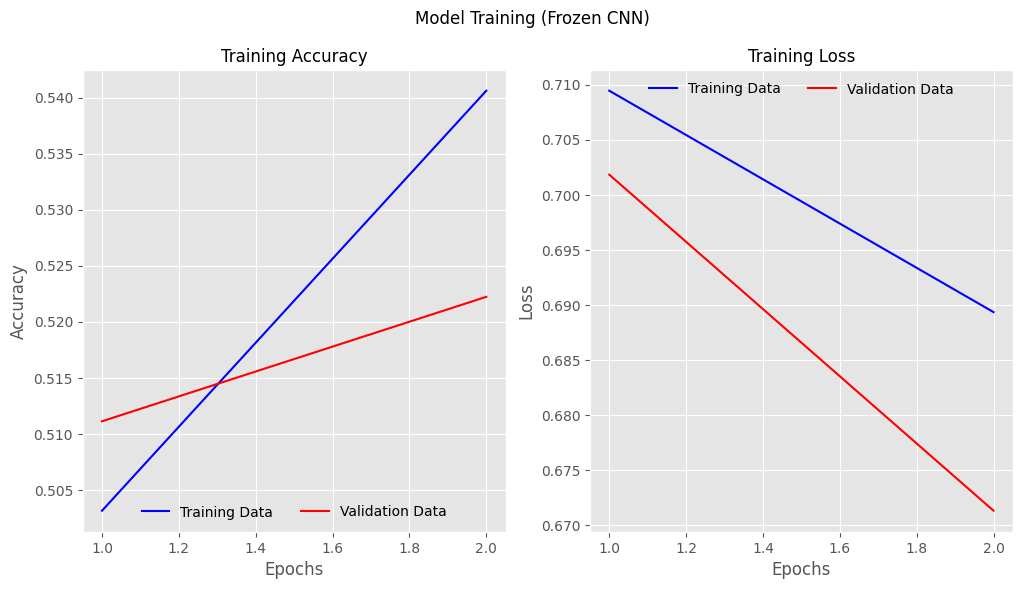

In [87]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_02.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_02.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_02.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_02.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_02.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [88]:

if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_02.save_weights(filepath="model_weights/vgg19_model_02.weights.h5", overwrite=True)

In [90]:
model_02.load_weights(r'C:\Users\sivab\Brain Tumor Image Classification\model_weights\vgg19_model_02.weights.h5')

In [91]:
vgg_val_eval_02 = model_02.evaluate(valid_generator)
vgg_test_eval_02 = model_02.evaluate(test_generator)

6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.5145 - loss: 0.6808
12/12 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.5104 - loss: 0.6850


In [92]:
#Unfreezing the entire network

In [93]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_03 = Model(base_model.inputs, output)
model_03.load_weights('model_weights/vgg19_model_02.weights.h5')

sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_03.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

c:\Users\sivab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [94]:
model_03.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 140,946,370 (537.67 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
history_03 = model_03.fit(train_generator, steps_per_epoch=10, epochs=2, callbacks=[es,cp,lrr],validation_data=valid_generator)

Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.5320 - loss: 0.7184 
Epoch 1: val_loss improved from 0.67132 to 0.62834, saving model to C:\Users\sivab\Brain Tumor Image Classification\model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 183s 18s/step - accuracy: 0.5325 - loss: 0.7179 - val_accuracy: 0.7056 - val_loss: 0.6283 - learning_rate: 1.0000e-04
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5875 - loss: 0.6929
Epoch 2: val_loss improved from 0.62834 to 0.62477, saving model to C:\Users\sivab\Brain Tumor Image Classification\model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 120s 11s/step - accuracy: 0.5890 - loss: 0.6911 - val_accuracy: 0.6278 - val_loss: 0.6248 - learning_rate: 1.0000e-04


In [96]:

if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_02.save_weights(filepath="model_weights/vgg19_model_03.weights.h5", overwrite=True)

In [98]:

model_03.load_weights("model_weights/vgg19_model_03.weights.h5")
vgg_val_eval_03 = model_03.evaluate(valid_generator)
vgg_test_eval_03 = model_03.evaluate(test_generator)

c:\Users\sivab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 40 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5154 - loss: 0.6746
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5246 - loss: 0.6799
